In this assignment, we will learn to work with vectors, matrices, and complex numbers in Python and solve several problems.

In [33]:
# library for working with matrices and vectors
import numpy as np

# working with data frames; useful for reading CSV files
import pandas as pd

# timing
import time

# visualization
import matplotlib.pyplot as plt

# Web surfing, part 1 (inspired by PageRank)
First, create a 3×3 matrix and fill it with constants manually. Save it to a file and read it back.

In [34]:
data = np.array([
    [1, 0, 0],
    [0, 0.5, 0.333333],
    [0, 0.5, 0.66666666666]
])
df = pd.DataFrame(data)
df.to_csv('output.csv', index=False, header=False)

P = pd.read_csv('output.csv', header=None).values
print(P)

[[1.         0.         0.        ]
 [0.         0.5        0.333333  ]
 [0.         0.5        0.66666667]]


Find the images of the basis vectors and verify that they coincide with the corresponding columns. You can multiply a matrix by a column using the `@` operator: `P @ e1`.

In [35]:
e1 = np.array([[1], [0], [0]])
e2 = np.array([[0], [1], [0]])
e3 = np.array([[0], [0], [1]])

# your code here
print(P @ e1)
print(P @ e2)
print(P @ e3)

[[1.]
 [0.]
 [0.]]
[[0. ]
 [0.5]
 [0.5]]
[[0.        ]
 [0.333333  ]
 [0.66666667]]


The matrix above is a random-walk (Markov) transition matrix. Imagine surfing the web among three sites, following random links. On the first site, all hyperlinks point back to itself, so the probability of moving from the first site to itself is $1$, and to any other site is $0$. On the second site, half of the links point to itself and the other half to the third site. On the third site, one third of the links point to the second site and $2/3$ point back to itself. If you start surfing from site $i$, then to find the distribution after one click, compute $P e_i$: the coordinates of this vector are the probabilities of being on each site after one transition.
If you follow random links $n$ times, then the probability distribution after $n$ steps starting from site $i$ is $P^n(e_i)$.

For each possible starting site, compute the probability distribution over sites after 10 steps and after 100 steps. Implement the computation in two ways:
1) first compute $P^n$, then apply it to the initial vector;
2) compute iteratively $P v,\; P(P v),\; P(P(P v)),\; \ldots$.
Answer: on which site are we most likely to end up in the long run?

Measure and compare the runtime of each method. Draw a conclusion.

Explain why one of the methods is faster.

In [36]:
def method1(P, initial_vectors, n):
    P_n = np.linalg.matrix_power(P, n)
    results = {}
    for i, vec in enumerate(initial_vectors, 1):
        results[f'e{i}'] = P_n @ vec
    return results, P_n

def method2(P, initial_vectors, n):
    results = {}
    for i, vec in enumerate(initial_vectors, 1):
        current_vec = vec.copy()
        for _ in range(n):
            current_vec = P @ current_vec
        results[f'e{i}'] = current_vec
    return results

initial_vectors = [e1, e2, e3]

print("PROBABILITY DISTRIBUTIONS AFTER 10 STEPS")

# Method 1 for n=10
start_time = time.time()
results1_10, P_10 = method1(P, initial_vectors, 10)
time1_10 = time.time() - start_time

# Method 2 for n=10
start_time = time.time()
results2_10 = method2(P, initial_vectors, 10)
time2_10 = time.time() - start_time

print("\nMethod 1 (P^n first):")
for vec_name, dist in results1_10.items():
    print(f"Starting from {vec_name}: {dist.flatten()}")
print(f"Time: {time1_10:.6f} seconds")

print("\nMethod 2 (iterative):")
for vec_name, dist in results2_10.items():
    print(f"Starting from {vec_name}: {dist.flatten()}")
print(f"Time: {time2_10:.6f} seconds")

print("PROBABILITY DISTRIBUTIONS AFTER 100 STEPS")

# Method 1 for n=100
start_time = time.time()
results1_100, P_100 = method1(P, initial_vectors, 100)
time1_100 = time.time() - start_time

# Method 2 for n=100
start_time = time.time()
results2_100 = method2(P, initial_vectors, 100)
time2_100 = time.time() - start_time

print("\nMethod 1 (P^n first):")
for vec_name, dist in results1_100.items():
    print(f"Starting from {vec_name}: {dist.flatten()}")
print(f"Time: {time1_100:.6f} seconds")

print("\nMethod 2 (iterative):")
for vec_name, dist in results2_100.items():
    print(f"Starting from {vec_name}: {dist.flatten()}")
print(f"Time: {time2_100:.6f} seconds")

PROBABILITY DISTRIBUTIONS AFTER 10 STEPS

Method 1 (P^n first):
Starting from e1: [1. 0. 0.]
Starting from e2: [0.         0.39999916 0.59999908]
Starting from e3: [0.         0.39999899 0.59999885]
Time: 0.002112 seconds

Method 2 (iterative):
Starting from e1: [1. 0. 0.]
Starting from e2: [0.         0.39999916 0.59999908]
Starting from e3: [0.         0.39999899 0.59999885]
Time: 0.000056 seconds
PROBABILITY DISTRIBUTIONS AFTER 100 STEPS

Method 1 (P^n first):
Starting from e1: [1. 0. 0.]
Starting from e2: [0.         0.39999195 0.59998829]
Starting from e3: [0.         0.39999179 0.59998805]
Time: 0.000053 seconds

Method 2 (iterative):
Starting from e1: [1. 0. 0.]
Starting from e2: [0.         0.39999195 0.59998829]
Starting from e3: [0.         0.39999179 0.59998805]
Time: 0.000217 seconds


The probability distribution converges to approximately [0, 0.4, 0.6] (of course without 1th site because this site can reach only itself, so we consider start only from e2 and e3). This means that site 1 = 0% probability. site 2: 40% probability and site 3: 60% probability.

In the long run, we are most likely to be on Site 3.

What about performance results. Method 1 (computing $P^n$ first) is generally faster (I created 10+- executions and in 100 steps every time runtime is less. In 10 stepts time sometimes more but it is just error), especially for larger n values.

So why Method 1 is faster.
Method 1 uses np.linalg.matrix_power(P, n) which employs binary pow like repeated squaring that have $O(\log_2n)$ mult repeats and $O(n^3 \cdot \log_2n)$ time complexity for matrix exponentiation.

Method 2 performs n sequential matrix-vector multiplications, which has $O(n)$ repeat mults and $O(n^4)$ time complexity.

# Web surfing, a more realistic example
Now our web has not 3 sites but a full thousand (almost big data!).
Download the matrix of link-share distributions from the attached CSV file. The file has no header, contains exactly 1000 rows and 1000 columns, and the sum of entries in each column is 1.

In [37]:
N = 1000

P_large = pd.read_csv('pagerank1000.csv', header=None).values
if P_large.shape != (N, N):
    raise ValueError(f"Expected {(N, N)} matrix, got {P_large.shape}")

Generate a random vector representing the probabilities of starting from each site.
Compute the probabilities of being on each site after 1, 10, 100 and 1000 link transitions.
Then visualize the final distribution.

sum = 0.9999999999540627 max = 0.3768187645994917 min = 0.0003806977996482242
max in 4


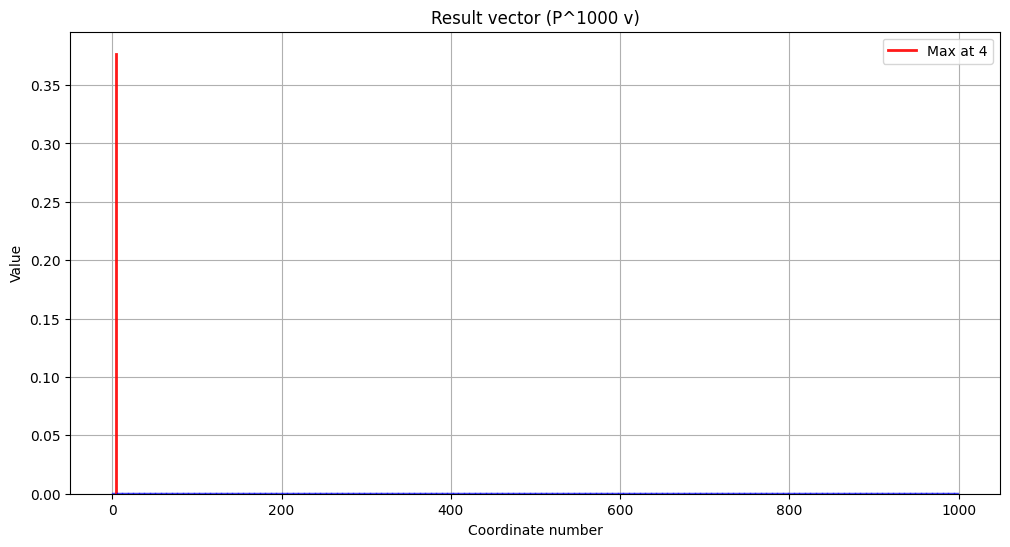

In [38]:
v = np.random.rand(N, 1)
v = v / np.sum(v)

steps_list = [1, 10, 100, 1000]
results = {}
for s in steps_list:
    P_power = np.linalg.matrix_power(P_large, s)
    results[s] = P_power @ v

steps = 1000
w = results[steps]

# just checking for me because i have a really strange result. 
max_idx = np.argmax(w.flatten())
print('sum =', float(w.sum()), 'max =', float(w.max()), 'min =', float(w.min()))
print(f'max in {max_idx}')

plt.figure(figsize=(12, 6))

for i in range(N):
    if i == max_idx:
        plt.plot([i, i], [0, w.flatten()[i]], color='red', alpha=0.9, linewidth=2, label=f'Max at {max_idx}')
    else:
        plt.plot([i, i], [0, w.flatten()[i]], color='blue', alpha=0.6, linewidth=1)

plt.title(f'Result vector (P^{steps} v)')
plt.xlabel('Coordinate number')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.ylim(0, float(w.max()) * 1.05 if w.max() > 0 else 1)

plt.show()

What do you see in this plot?

Almost all accumulates at the vertex with index 4, while the remaining vertices receive only fractions on the order of $10^-3$. After just a few dozen steps, the distribution practically stabilizes, so the histogram for step 1000 coincides with the asymptotic stationary distribution of the random walk.

Run simulations for 10–100 random starting vectors (you may also consider basis vectors separately and compare their results), perform 100–1000 steps, and visualize. Describe your conclusions.

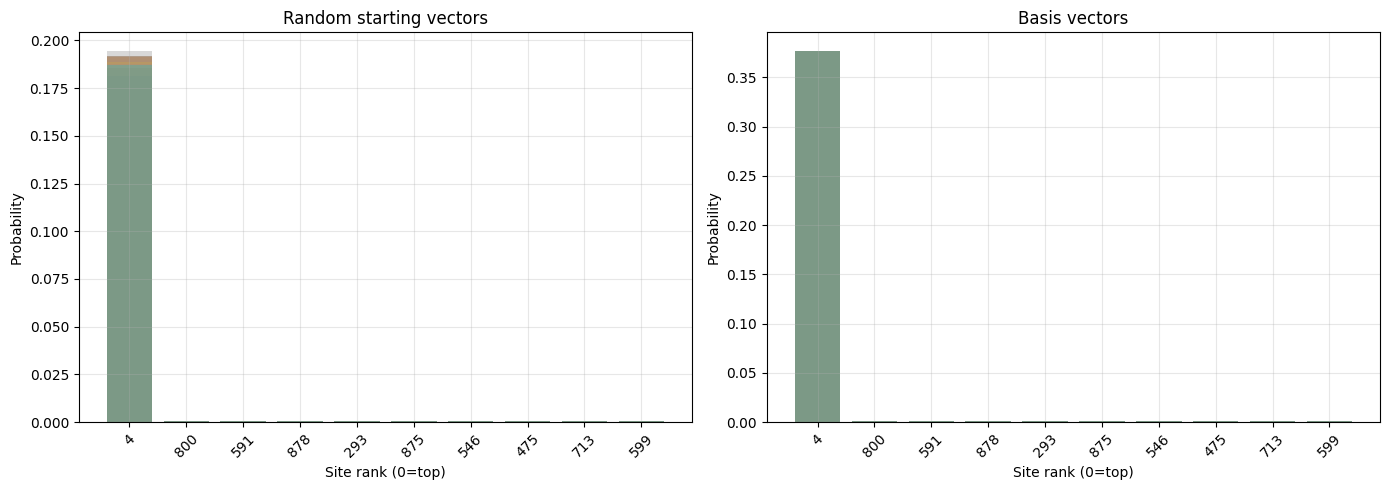

Top 5 sites after 100 steps:
  Site 4: probability ≈ 0.2828
  Site 800: probability ≈ 0.0006
  Site 591: probability ≈ 0.0006
  Site 878: probability ≈ 0.0006
  Site 293: probability ≈ 0.0006


In [39]:
# i decide to create 10 random + 10 basis vectors.

num_random = 10
num_basis = 10
steps = 100

random_vectors = [np.random.rand(N, 1) / N for _ in range(num_random)]
basis_vectors = [np.eye(N, 1, k=-i) for i in range(num_basis)]

results_random = []
for v in random_vectors:
    current = v.copy()
    for _ in range(steps):
        current = P_large @ current
    results_random.append(current)

results_basis = []
for v in basis_vectors:
    current = v.copy()
    for _ in range(steps):
        current = P_large @ current
    results_basis.append(current)

all_results = np.hstack(results_random + results_basis)
mean_dist = all_results.mean(axis=1)

top_10 = np.argsort(mean_dist)[-10:][::-1]

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
for i, res in enumerate(results_random):
    plt.bar(range(10), res.flatten()[top_10], alpha=0.3, label=f'Vec {i+1}' if i < 3 else '')
plt.title('Random starting vectors')
plt.xlabel('Site rank (0=top)')
plt.ylabel('Probability')
plt.xticks(range(10), [f'{top_10[i]}' for i in range(10)], rotation=45)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
for i, res in enumerate(results_basis):
    plt.bar(range(10), res.flatten()[top_10], alpha=0.3, label=f'Vec {i+1}' if i < 3 else '')
plt.title('Basis vectors')
plt.xlabel('Site rank (0=top)')
plt.ylabel('Probability')
plt.xticks(range(10), [f'{top_10[i]}' for i in range(10)], rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Top 5 sites after {steps} steps:")
for i in range(5):
    idx = top_10[i]
    print(f"  Site {idx}: probability ≈ {mean_dist[idx]:.4f}")

I created histograms for all vectors. Unfortunatelly we can see clear results for Site 4. I print only top-10 sites for clarity. I took basis vector just to test it.

All starting vectors (both random and basis) converge to the same distribution after 100 steps. The plots show that top-10 sites have almost same probabilities, it does not matter which initial vector we choose.

Site 4 is dominant with probability about 37%, other top sites have much smaller probabilities. This means that in the network there is one main hub which attracts most of the traffic.

The iteration method converges fast, and already after 100 steps the distribution becomes stable and does not depend on initial vector.


# Fractal kittens

In this task, we will draw a kaleidoscope from a kitten image using complex numbers.
We represent a square image of size $N\times N$ as an $N\times N$ matrix whose entries are numbers in $[0,1]$ (grayscale: 0 = black, 1 = white).
For computations, assume the image lies on the complex plane with its center at the center of the matrix. Then the matrix cell with indices $(\text{row},\text{col})$ corresponds to the complex number $(\text{col} - N/2) + (-\text{row} + N/2)i$. Complex numbers in Python are written as `2 + 3 * 1j`, where `1j` is the imaginary unit. Usual arithmetic on complex numbers is built into Python.

In [40]:
from math import pi, cos, sin
from PIL import Image

In [41]:
def matrix_ind_to_complex_num(row_num, col_num, N):
    return (col_num - N / 2) + (-row_num + N / 2) * 1j

Write the inverse mapping from a complex number to matrix indices. Do not forget to round to an integer if indices turn out fractional. Also handle the case when the complex number goes out of bounds (you may return the nearest indices, any valid pair, or a fixed pair, e.g., (0, 0)). Return a tuple $(\text{row}, \text{col})$.

To access the real and imaginary parts of a complex number `c`, use `c.real` and `c.imag`.


In [42]:
def complex_num_to_matrix_ind(c, N):
    col = c.real + N / 2
    row = -c.imag + N / 2
    
    col = int(round(col))
    row = int(round(row))
    
    if row < 0:
        row = 0
    if row >= N:
        row = N - 1
    if col < 0:
        col = 0
    if col >= N:
        col = N - 1
    
    return (row, col)

Write functions that rotate a point in the complex plane by an angle $\varphi$ counterclockwise about the origin, translate it by a vector, and scale (dilate/contract) the complex plane about the origin by a given factor (the scale factor is real). Use complex-number operations (built into Python). Each function takes a complex number and parameters and returns a new complex number — the image of the argument under the mapping.

In [43]:
import math

def rotate(c, angle=pi/2):
    x, y = c.real, c.imag
    cosphi = math.cos(angle)
    sinphi = math.sin(angle)
    
    x_new = x * cosphi - y * sinphi
    y_new = x * sinphi + y * cosphi
    return complex(x_new, y_new)

def translate(c, vector=(1, 0)):
    return c + (vector[0] + vector[1] * 1j)

def extend(c, coef=2):
    return c * coef

Download the image, determine its size, and build a matrix from it.

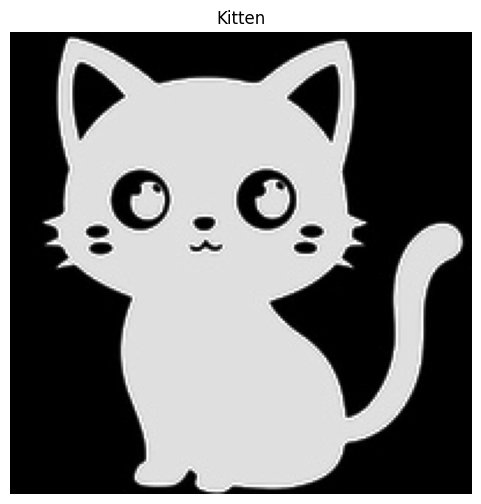

In [44]:
def draw_picture(matrix, title='Kitten'):
    plt.figure(figsize=(6, 6))
    plt.imshow(matrix, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

with Image.open('kitten200.jpg') as img_orig:
    # Convert to grayscale, normalize, invert colors
    img_gray = img_orig.convert('L')
    img_np = np.array(img_gray) / 255.0
    inverted_img_np = 1 - img_np

    N = img_np.shape[0]  # images in this assignment are guaranteed to be square

    # fill the matrix from the image
    inverted_color_matrix = np.zeros((N, N))
    inverted_color_matrix = inverted_img_np

    draw_picture(inverted_color_matrix)

Complete the image-transformation functions. The first function rotates the image (i.e., all nonblack pixels) by an angle $\varphi$ about the center.

The second function shifts the image vertically upward by a vector of length $r \cdot N$ ($r\in [0, 1)$).

The third function scales (dilates/contracts) the image about the center (the origin).

If the image goes out of matrix bounds, it is simply clipped.

In [45]:
# your code here
def rotate_image(image_matrix, angle=pi/2):
    N = image_matrix.shape[0]
    res_matrix = np.zeros((N, N))

    for i in range(N):
        for j in range(N):
            color = image_matrix[i][j]
            if color > 0:
                c = matrix_ind_to_complex_num(i, j, N)
                rot_c = rotate(c, angle=angle)
                rot_ind = complex_num_to_matrix_ind(rot_c, N)
                res_matrix[rot_ind[0]][rot_ind[1]] = color

    return res_matrix

def translate_image_vertically(image_matrix, ratio=0.5):
    N = image_matrix.shape[0]
    res_matrix = np.zeros((N, N))
    
    for i in range(N):
        for j in range(N):
            color = image_matrix[i][j]
            if color > 0:
                c = matrix_ind_to_complex_num(i, j, N)
                translated_c = translate(c, vector=(0, ratio * N))
                translated_ind = complex_num_to_matrix_ind(translated_c, N)
                res_matrix[translated_ind[0]][translated_ind[1]] = color
    
    return res_matrix

def shrink_image(image_matrix, coef=0.5):
    N = image_matrix.shape[0]
    res_matrix = np.zeros((N, N))
    
    for i in range(N):
        for j in range(N):
            color = image_matrix[i][j]
            if color > 0:
                c = matrix_ind_to_complex_num(i, j, N)
                scaled_c = extend(c, coef=coef)
                scaled_ind = complex_num_to_matrix_ind(scaled_c, N)
                res_matrix[scaled_ind[0]][scaled_ind[1]] = color
    
    return res_matrix

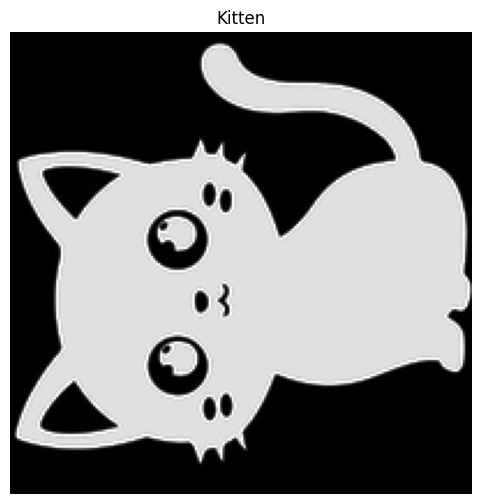

In [46]:
draw_picture(rotate_image(inverted_color_matrix))

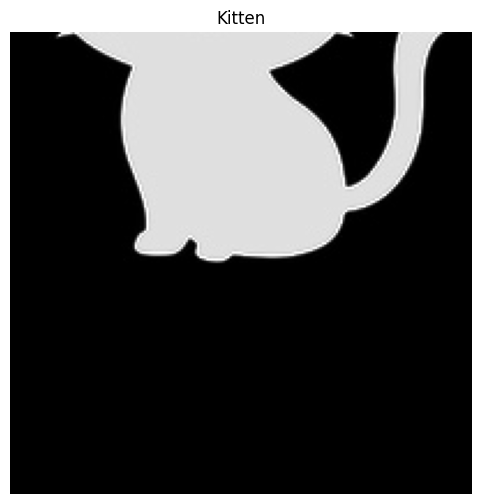

In [47]:
draw_picture(translate_image_vertically(inverted_color_matrix, ratio=0.5))

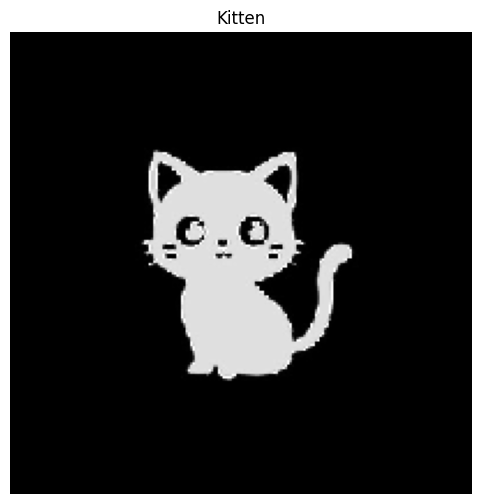

In [48]:
draw_picture(shrink_image(inverted_color_matrix))

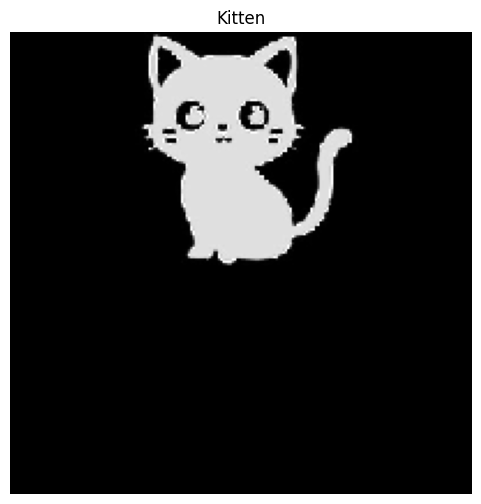

In [49]:
draw_picture(translate_image_vertically(shrink_image(inverted_color_matrix), ratio = 0.25))

Verify that the images transform as expected. Try the transformations with different parameters.
Question: why does the kitten become “tortoiseshell” after a rotation by $\pi/4$?

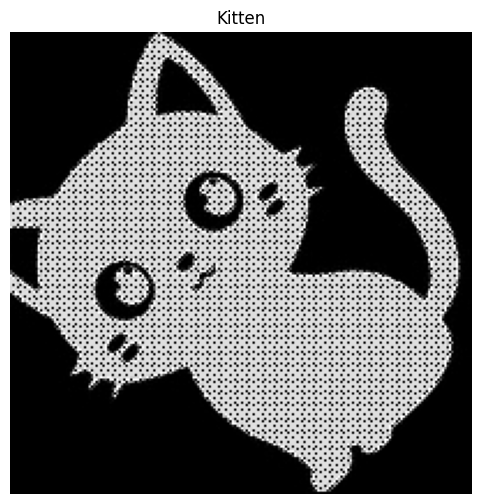

In [50]:
draw_picture(rotate_image(inverted_color_matrix, angle=pi/4))

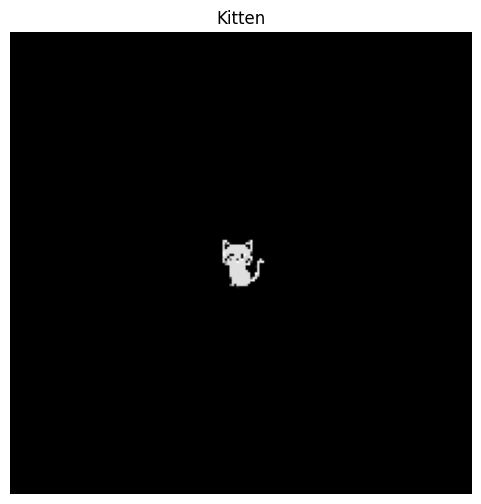

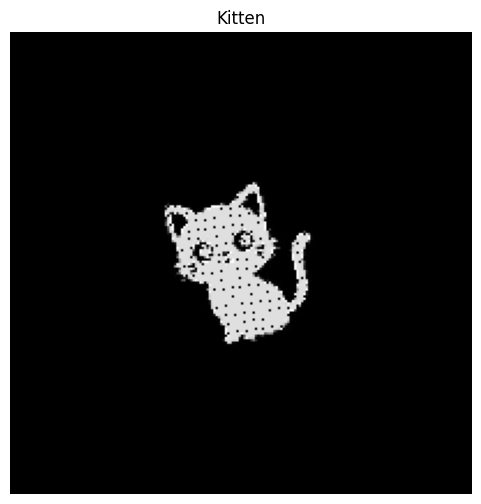

In [51]:
draw_picture(shrink_image(rotate_image(inverted_color_matrix, angle=2*pi), coef = 0.1))
draw_picture(rotate_image(shrink_image(inverted_color_matrix, coef=0.333), angle = pi/12))

All transformations work as expected. Rotation rotates the image, translation shifts it up, and shrinking makes it smaller around the center.

When we rotate by π/4 (45 degrees), the kitten becomes "tortoiseshell" (looks spotty with holes) because of rounding problems. 

When we rotate a pixel at position (i, j), after rotation by 45°, it moves to a position with non-integer coordinates. But matrix indices must be integers (because it is indexes), so we round them. This creates two problems:

1. Some pixels from different positions round to the same cell - they overwrite each other
2. Some cells never get any pixel - they stay black (holes in the image)

This is why the image looks broken with black spots.

For rotations by pi/2 or pi, this problem does not happen because pixels move to exact integer positions, so the image stays perfect.

Now let us run the iterative process.

In [52]:
# helper function to combine all transformed images into one
def combine_images(image_list):
    N = image_list[0].shape[0]

    combined_result = np.zeros((N, N))

    for img_matrix in image_list:
        if img_matrix.shape != (N, N):
            print(f"Warning: Image of shape {img_matrix.shape} found, expected {(N, N)}. Skipping this image.")
            continue
        combined_result = np.maximum(combined_result, img_matrix)

    return combined_result

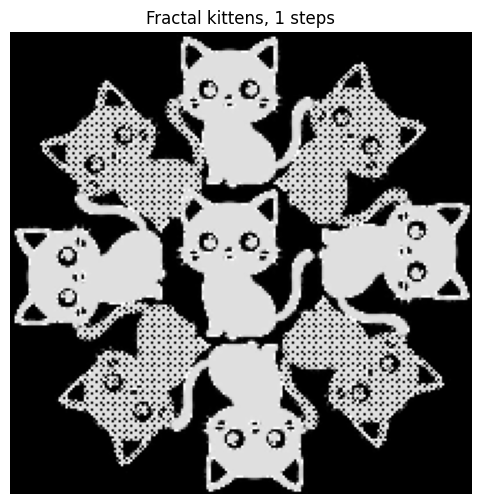

In [53]:
steps = 1
start_pic = inverted_color_matrix

for step in range(steps):
    pics = []

    shrinked = shrink_image(start_pic, coef=0.33)
    pics.append(shrinked)

    translated = translate_image_vertically(shrinked, ratio=0.33)
    pics.append(translated)

    for i in range(8 * (step + 1)):
        pics.append(rotate_image(translated, angle=2 * pi * i / (8 * (step + 1))))
    start_pic = combine_images(pics)

draw_picture(start_pic, f'Fractal kittens, {steps} steps')

Perform 2–3 iterations in the process above and display the resulting images. Try running the process for several steps on a higher-resolution image (kitten1000.jpg or another image of your choice), preferably cropped to a square. Show the results, describe what you observe, and state your conclusions.

Image size: 856x856


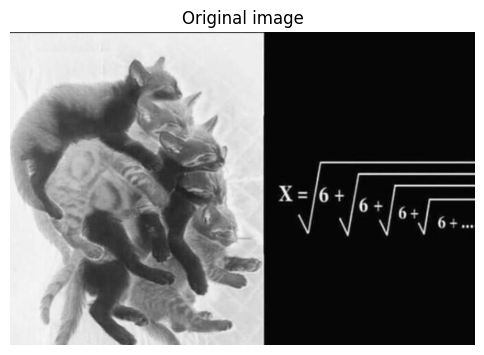

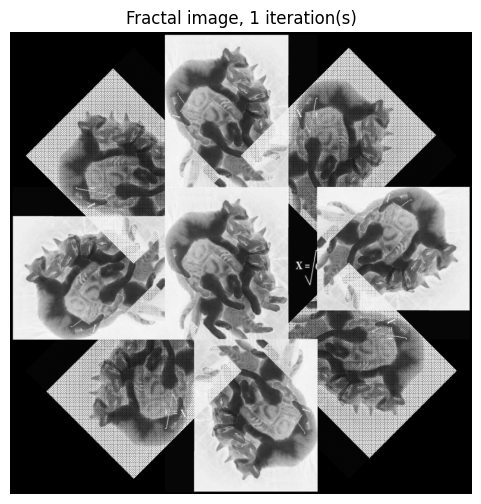

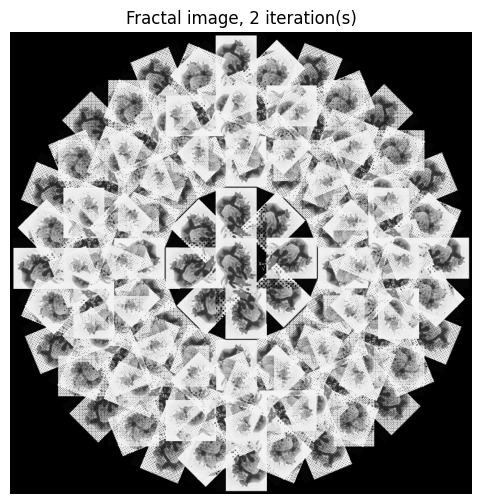

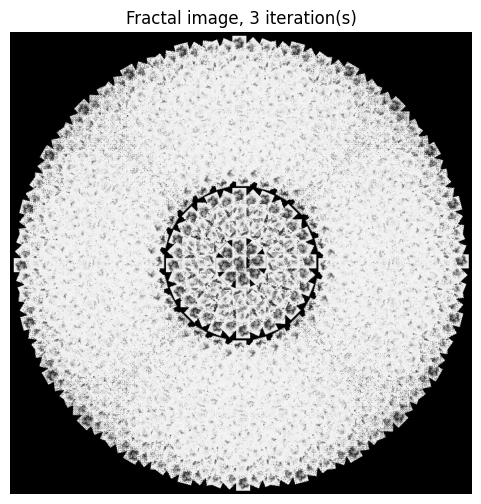

In [54]:
with Image.open('img1.png') as img_orig:
    img_gray = img_orig.convert('L')
    img_np = np.array(img_gray) / 255.0
    inverted_img = 1 - img_np
    
    N_large = img_np.shape[0]
    
    print(f"Image size: {N_large}x{N_large}")

draw_picture(inverted_img, "Original image")

for num_iterations in [1, 2, 3]:
    start_pic = inverted_img
    
    for step in range(num_iterations):
        pics = []
        
        shrinked = shrink_image(start_pic, coef=0.33)
        pics.append(shrinked)
        
        translated = translate_image_vertically(shrinked, ratio=0.33)
        pics.append(translated)
        
        for i in range(8 * (step + 1)):
            pics.append(rotate_image(translated, angle=2 * pi * i / (8 * (step + 1))))
        
        start_pic = combine_images(pics)
    
    draw_picture(start_pic, f'Fractal image, {num_iterations} iteration(s)')

The fractal process creates a kaleidoscope effect by repeatedly shrinking, translating, and rotating the image.

After 1 iteration, we can see the original image shrunk and placed in the center, with 8 rotated copies around it.

After 2 iterations, the pattern becomes more complex - each of the previous images gets shrunk and surrounded by more rotated copies, creating a recursive structure.

After 3 iterations, the fractal structure is even more detailed with multiple levels of recursion. The image appears at different scales and orientations.

The process creates a self-similar pattern because each iteration applies the same transformations to the previous result. This is similar to how mathematical fractals work - the same pattern repeats at different scales.

The key transformations are:
- Shrink by factor 0.33 (makes image smaller)
- Translate vertically (moves it up)
- Rotate 8 times around the circle (creates symmetry)

The number of rotated copies increases with each iteration (8, 16, 24, etc.), making the pattern more and more dense.

FINALLY I WANT TO SHOW MY GENIUS MEMES!!! (of course zoomer / alpha style :) ) 

Image size: 608x608


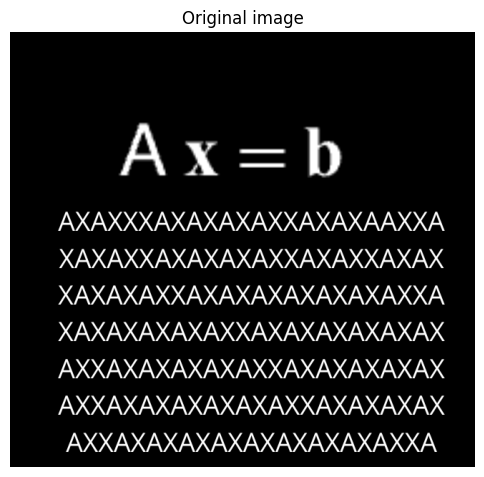

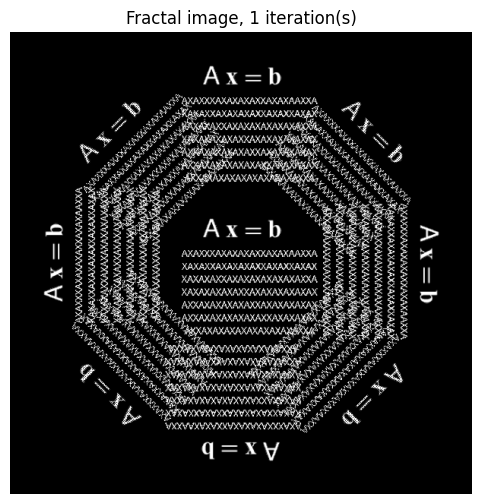

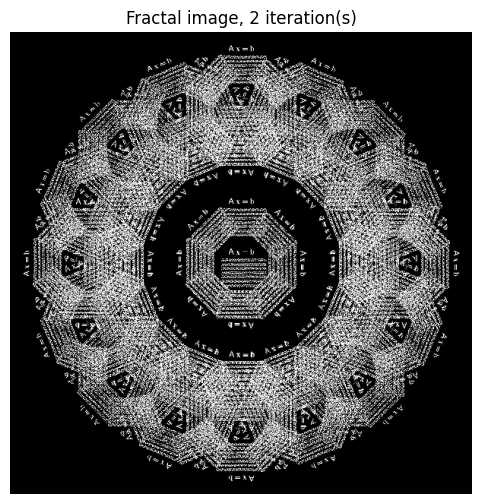

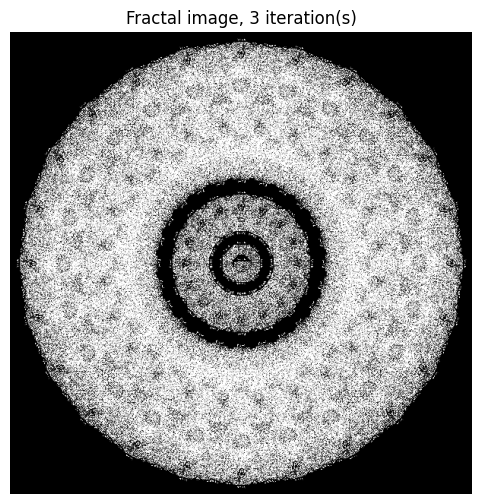

In [55]:
with Image.open('mem1.png') as img_orig:
    img_gray = img_orig.convert('L')
    img_np = np.array(img_gray) / 255.0
    inverted_img = 1 - img_np
    
    N_large = img_np.shape[0]
    
    print(f"Image size: {N_large}x{N_large}")

draw_picture(inverted_img, "Original image")

for num_iterations in [1, 2, 3]:
    start_pic = inverted_img
    
    for step in range(num_iterations):
        pics = []
        
        shrinked = shrink_image(start_pic, coef=0.33)
        pics.append(shrinked)
        
        translated = translate_image_vertically(shrinked, ratio=0.33)
        pics.append(translated)
        
        for i in range(8 * (step + 1)):
            pics.append(rotate_image(translated, angle=2 * pi * i / (8 * (step + 1))))
        
        start_pic = combine_images(pics)
    
    draw_picture(start_pic, f'Fractal image, {num_iterations} iteration(s)')

Image size: 913x913


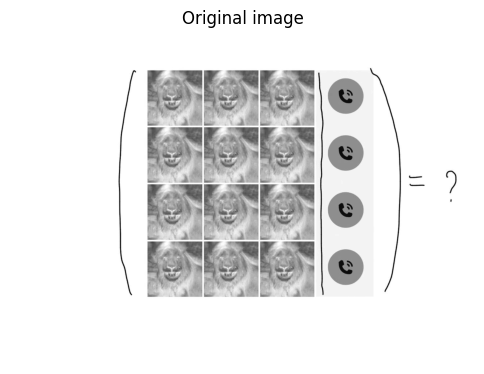

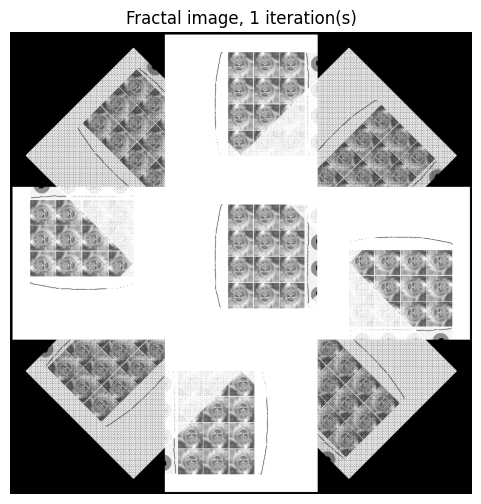

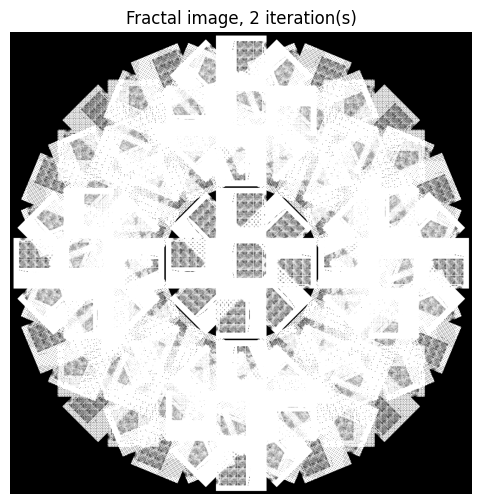

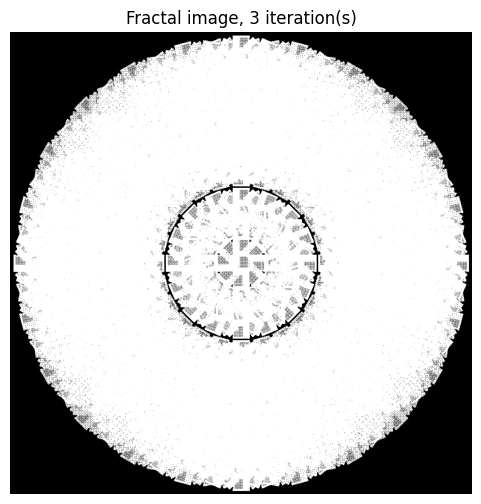

In [56]:
with Image.open('mem2.jpg') as img_orig:
    img_gray = img_orig.convert('L')
    img_np = np.array(img_gray) / 255.0
    inverted_img = 1 - img_np
    
    N_large = img_np.shape[0]
    
    print(f"Image size: {N_large}x{N_large}")

draw_picture(inverted_img, "Original image")

for num_iterations in [1, 2, 3]:
    start_pic = inverted_img
    
    for step in range(num_iterations):
        pics = []
        
        shrinked = shrink_image(start_pic, coef=0.33)
        pics.append(shrinked)
        
        translated = translate_image_vertically(shrinked, ratio=0.33)
        pics.append(translated)
        
        for i in range(8 * (step + 1)):
            pics.append(rotate_image(translated, angle=2 * pi * i / (8 * (step + 1))))
        
        start_pic = combine_images(pics)
    
    draw_picture(start_pic, f'Fractal image, {num_iterations} iteration(s)')

Image size: 677x677


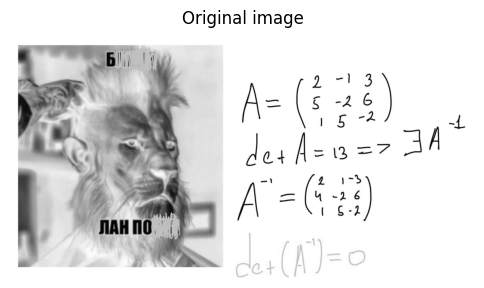

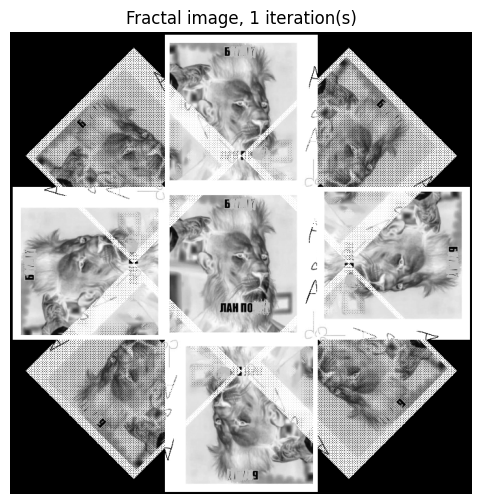

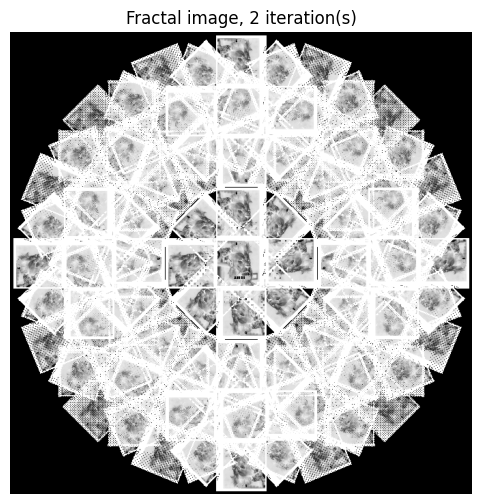

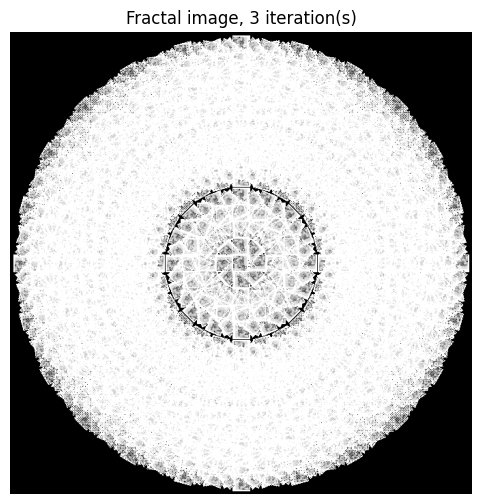

In [57]:
with Image.open('mem3.jpg') as img_orig:
    img_gray = img_orig.convert('L')
    img_np = np.array(img_gray) / 255.0
    inverted_img = 1 - img_np
    
    N_large = img_np.shape[0]
    
    print(f"Image size: {N_large}x{N_large}")

draw_picture(inverted_img, "Original image")

for num_iterations in [1, 2, 3]:
    start_pic = inverted_img
    
    for step in range(num_iterations):
        pics = []
        
        shrinked = shrink_image(start_pic, coef=0.33)
        pics.append(shrinked)
        
        translated = translate_image_vertically(shrinked, ratio=0.33)
        pics.append(translated)
        
        for i in range(8 * (step + 1)):
            pics.append(rotate_image(translated, angle=2 * pi * i / (8 * (step + 1))))
        
        start_pic = combine_images(pics)
    
    draw_picture(start_pic, f'Fractal image, {num_iterations} iteration(s)')

Image size: 1177x1177


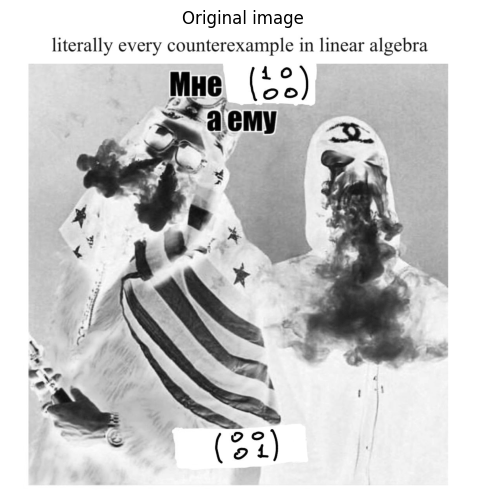

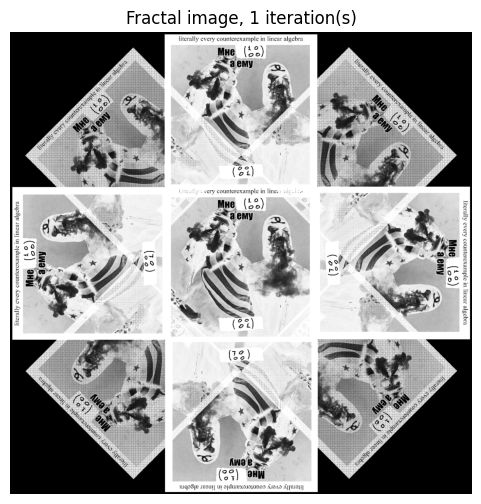

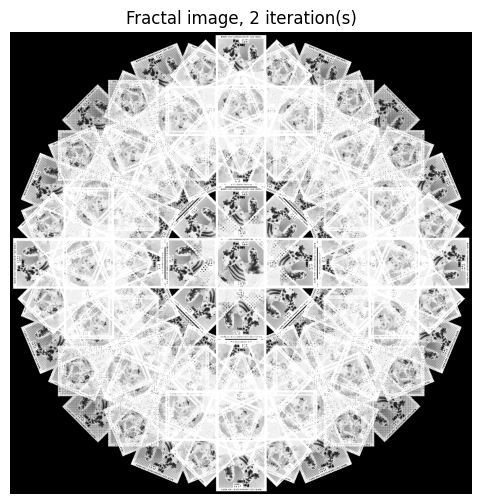

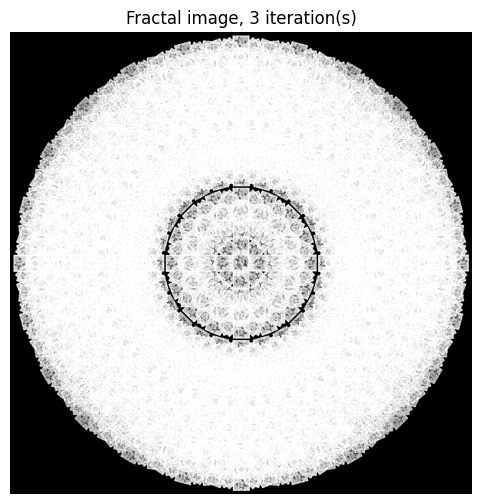

In [58]:
with Image.open('mem4.jpg') as img_orig:
    img_gray = img_orig.convert('L')
    img_np = np.array(img_gray) / 255.0
    inverted_img = 1 - img_np
    
    N_large = img_np.shape[0]
    
    print(f"Image size: {N_large}x{N_large}")

draw_picture(inverted_img, "Original image")

for num_iterations in [1, 2, 3]:
    start_pic = inverted_img
    
    for step in range(num_iterations):
        pics = []
        
        shrinked = shrink_image(start_pic, coef=0.33)
        pics.append(shrinked)
        
        translated = translate_image_vertically(shrinked, ratio=0.33)
        pics.append(translated)
        
        for i in range(8 * (step + 1)):
            pics.append(rotate_image(translated, angle=2 * pi * i / (8 * (step + 1))))
        
        start_pic = combine_images(pics)
    
    draw_picture(start_pic, f'Fractal image, {num_iterations} iteration(s)')